In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('JPM_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-07-21 19:12:17,0.2960,Citi ordered to pay $770 million over credit c...,0.117,0.667,0.217,1
2015-08-14 17:16:07,-0.3182,BNP Paribas to pay $115 mln to settle currency...,0.268,0.732,0.000,-1
2015-09-17 22:39:02,0.0000,Wall Street banks eye December for Fed liftoff...,0.000,1.000,0.000,0
2015-10-05 16:43:23,-0.1779,Global business growth at weakest pace this ye...,0.221,0.604,0.174,-1
2015-10-13 14:09:06,0.0000,Barclays set to name former JPMorgan banker St...,0.000,1.000,0.000,0
2015-10-14 00:17:23,0.2732,JPMorgan goes on a diet to appease regulators,0.000,0.741,0.259,1
2015-10-15 18:19:27,0.1027,Goldman profit plunges as market turmoil hits ...,0.202,0.565,0.234,1
2015-12-02 22:37:26,0.1280,Exclusive: Barclays' boss wants Blythe Masters...,0.000,0.870,0.130,1
2015-12-28 21:14:43,0.0000,JPMorgan to raise deposit rates for some big c...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-07-21,0.296,0.117,0.667,0.217,1.0
2015-07-22,0.000,0.000,0.000,0.000,0.0
2015-07-23,0.000,0.000,0.000,0.000,0.0
2015-07-24,0.000,0.000,0.000,0.000,0.0
2015-07-25,0.000,0.000,0.000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.7783,0.0,0.541,0.459,1.0
2016-07-02,0.0000,0.0,0.000,0.000,0.0
2016-07-03,0.0000,0.0,0.000,0.000,0.0
2016-07-04,0.0000,0.0,1.000,0.000,0.0
2016-07-05,0.0000,0.0,1.000,0.000,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.070449,0.038489,0.709395,0.082408,0.151286
std,0.144265,0.052439,0.330678,0.079515,0.316816
min,-0.743000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.754250,0.000000,0.000000
50%,0.050855,0.025539,0.843455,0.075640,0.111111
75%,0.120065,0.056277,0.896595,0.117271,0.266667
max,0.848100,0.558000,1.000000,0.714000,1.000000


### Fundamental Data

In [13]:
fund = pd.read_csv('JPM_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2016,3.670000e+11,1.4334,14.7900,0.020655,0.067613,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
1,04/07/2016,3.700000e+11,1.4451,14.9104,0.020488,0.067067,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2,05/07/2016,3.700000e+11,1.4451,14.9104,0.020488,0.067067,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
3,06/07/2016,3.710000e+11,1.4462,14.9226,0.020472,0.067012,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
4,07/07/2016,3.810000e+11,1.4865,15.3379,0.019917,0.065198,23958000000,38881000000,0.09707,0.011099,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578


In [14]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [15]:

fund.index =fund['date']

In [16]:
fund=fund.loc['2016/07/01':'2019/07/01']

In [17]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-07-01
Data columns (total 32 columns):
date                              782 non-null datetime64[ns]
marketcap                         782 non-null float64
pricetobook                       782 non-null float64
pricetoearnings                   782 non-null float64
dividendyield                     782 non-null float64
earningsyield                     782 non-null float64
nopat                             782 non-null int64
freecashflow                      782 non-null int64
roe                               782 non-null float64
ebitdagrowth                      782 non-null float64
ebitdamargin                      782 non-null float64
cashdividendspershare             782 non-null float64
bookvaluepershare                 782 non-null float64
debttoequity                      782 non-null float64
epsgrowth                         782 non-null float64
investedcapitalgrowth             782 non-null f

### Price analysis

In [18]:
df_price = pd.read_csv('JPM_price.csv')

In [19]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [20]:
#df_price = df_price.drop(['date'], axis=1)

In [21]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-07,0,108.03,108.28,105.940,108.00,16523288.0,108.03,2019-08-07,daily,108.28,False,105.940,108.00,17320865.0
2019-08-06,1,110.43,110.50,108.340,110.05,10203487.0,110.43,2019-08-06,daily,110.50,False,108.340,110.05,10203487.0
2019-08-05,2,109.57,110.98,108.265,110.79,15855328.0,109.57,2019-08-05,daily,110.98,False,108.265,110.79,15855328.0
2019-08-02,3,112.93,113.43,111.400,112.40,11025527.0,112.93,2019-08-02,daily,113.43,False,111.400,112.40,11025527.0
2019-08-01,4,112.94,116.80,112.595,115.33,15664530.0,112.94,2019-08-01,daily,116.80,False,112.595,115.33,15664530.0


In [22]:
df_price=df_price[::-1]

In [23]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-30 to 2019-08-07
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [24]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [25]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [26]:
df_price.ma200

date
2016-07-01    0.996165
2016-07-05    1.024660
2016-07-06    1.013847
2016-07-07    1.007394
2016-07-08    0.987243
2016-07-11    0.980537
2016-07-12    0.966480
2016-07-13    0.967365
2016-07-14    0.953338
2016-07-15    0.952918
2016-07-18    0.956566
2016-07-19    0.958393
2016-07-20    0.957690
2016-07-21    0.961535
2016-07-22    0.956540
2016-07-25    0.959327
2016-07-26    0.955698
2016-07-27    0.953017
2016-07-28    0.956726
2016-07-29    0.958963
2016-08-01    0.961919
2016-08-02    0.964429
2016-08-03    0.949641
2016-08-04    0.951397
2016-08-05    0.926815
2016-08-08    0.930026
2016-08-09    0.933581
2016-08-10    0.942232
2016-08-11    0.939865
2016-08-12    0.942113
                ...   
2019-05-20    0.958446
2019-05-21    0.955105
2019-05-22    0.962784
2019-05-23    0.981834
2019-05-24    0.972021
2019-05-28    0.982375
2019-05-29    0.984819
2019-05-30    0.995206
2019-05-31    1.005284
2019-06-03    1.000299
2019-06-04    0.970337
2019-06-05    0.966807
2019-0

In [27]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [28]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [29]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
df_price.index =df_price['date']

In [31]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,779.0,56.820952,57.517997,56.728199,57.062112,14217796.0,61.26,2016-07-01,daily,62.0115,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-05,778.0,55.234863,56.208778,54.817471,56.069647,23357694.0,59.55,2016-07-05,daily,60.6000,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-06,777.0,55.828487,55.921241,54.502109,54.733993,20429800.0,60.19,2016-07-06,daily,60.2900,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-07,776.0,56.190227,56.709648,55.800661,56.134575,13771417.0,60.58,2016-07-07,daily,61.1400,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578
2016-07-08,775.0,57.349649,57.665012,56.885880,56.885880,16998814.0,61.83,2016-07-08,daily,62.1700,...,36165000000,2.470000e+12,2.210000e+12,3.330000e+11,23958000000,23958000000,-2.255500e+10,77000000,77000000,1.0578


In [32]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    779.0
2016-07-05    778.0
2016-07-06    777.0
2016-07-07    776.0
2016-07-08    775.0
2016-07-11    774.0
2016-07-12    773.0
2016-07-13    772.0
2016-07-14    771.0
2016-07-15    770.0
2016-07-18    769.0
2016-07-19    768.0
2016-07-20    767.0
2016-07-21    766.0
2016-07-22    765.0
2016-07-25    764.0
2016-07-26    763.0
2016-07-27    762.0
2016-07-28    761.0
2016-07-29    760.0
2016-08-01    759.0
2016-08-02    758.0
2016-08-03    757.0
2016-08-04    756.0
2016-08-05    755.0
2016-08-08    754.0
2016-08-09    753.0
2016-08-10    752.0
2016-08-11    751.0
2016-08-12    750.0
              ...  
2019-06-28     27.0
2019-07-01     26.0
2016-07-04      NaN
2016-09-05      NaN
2016-11-24      NaN
2016-12-26      NaN
2017-01-02      NaN
2017-01-16      NaN
2017-02-20      NaN
2017-04-14      NaN
2017-05-29      NaN
2017-07-04      NaN
2017-09-04      NaN
2017-11-23      NaN
2017-12-25      NaN
2018-01-01      NaN
2018-01-15      NaN
2018-0

In [33]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-05-27
Data columns (total 54 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null

In [34]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [35]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda',
       'totalassets', 'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')

In [36]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
        'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [37]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [38]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,779.0,56.820952,57.517997,56.728199,57.062112,14217796.0,61.26,2016-07-01,daily,62.0115,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-05,778.0,55.234863,56.208778,54.817471,56.069647,23357694.0,59.55,2016-07-05,daily,60.6000,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-06,777.0,55.828487,55.921241,54.502109,54.733993,20429800.0,60.19,2016-07-06,daily,60.2900,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-07,776.0,56.190227,56.709648,55.800661,56.134575,13771417.0,60.58,2016-07-07,daily,61.1400,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578
2016-07-08,775.0,57.349649,57.665012,56.885880,56.885880,16998814.0,61.83,2016-07-08,daily,62.1700,...,3.616500e+10,2.470000e+12,2.210000e+12,3.330000e+11,2.395800e+10,2.395800e+10,-2.255500e+10,77000000.0,77000000.0,1.0578


### EDA

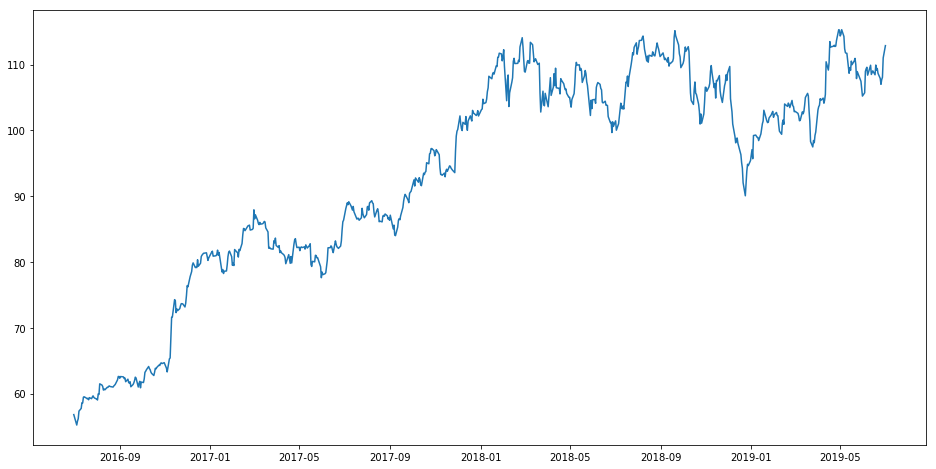

In [39]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

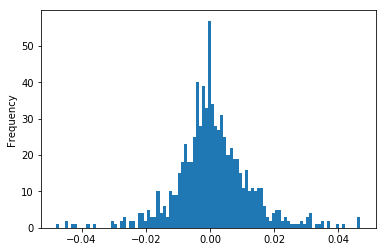

In [40]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

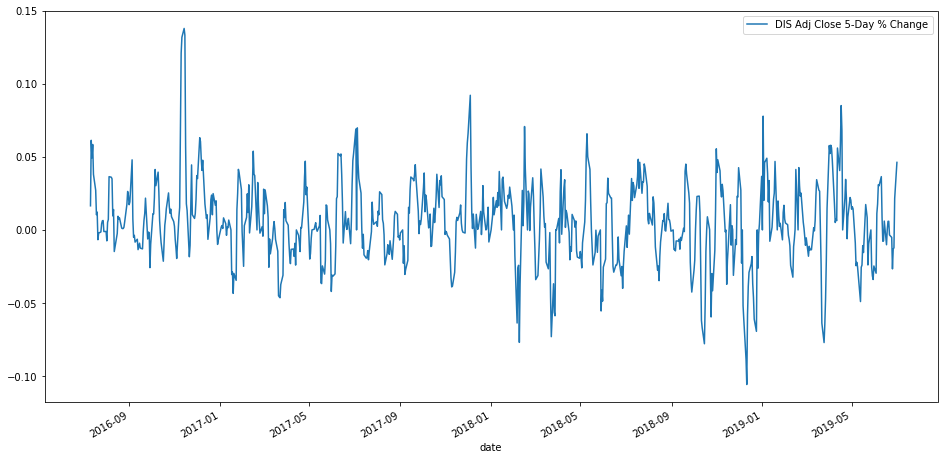

In [41]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='DIS Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.079439
5d_close_future_pct     -0.079439             1.000000


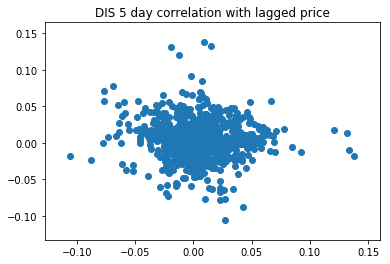

In [42]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.076991
5d_close_future_pct -0.076991             1.000000


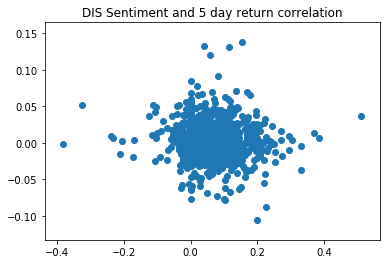

In [43]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct              1.00000              0.01317
1d_close_future_pct       0.01317              1.00000


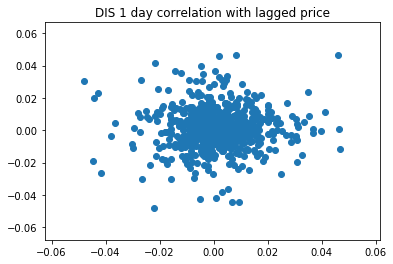

In [44]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000            -0.060528
1d_close_future_pct -0.060528             1.000000


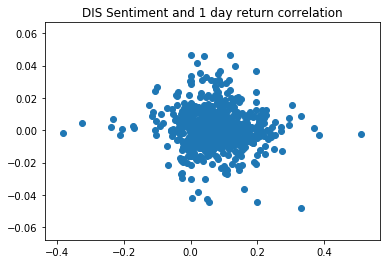

In [45]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct               1.00000              -0.06779
30d_close_future_pct       -0.06779               1.00000


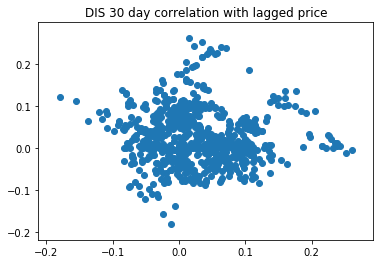

In [46]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('DIS 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound               1.00000              -0.07011
30d_close_future_pct  -0.07011               1.00000


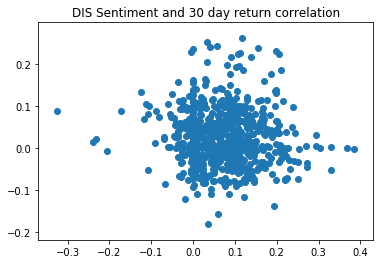

In [47]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [48]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [49]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-05-27
Data columns (total 62 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null

In [50]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [51]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [52]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [53]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


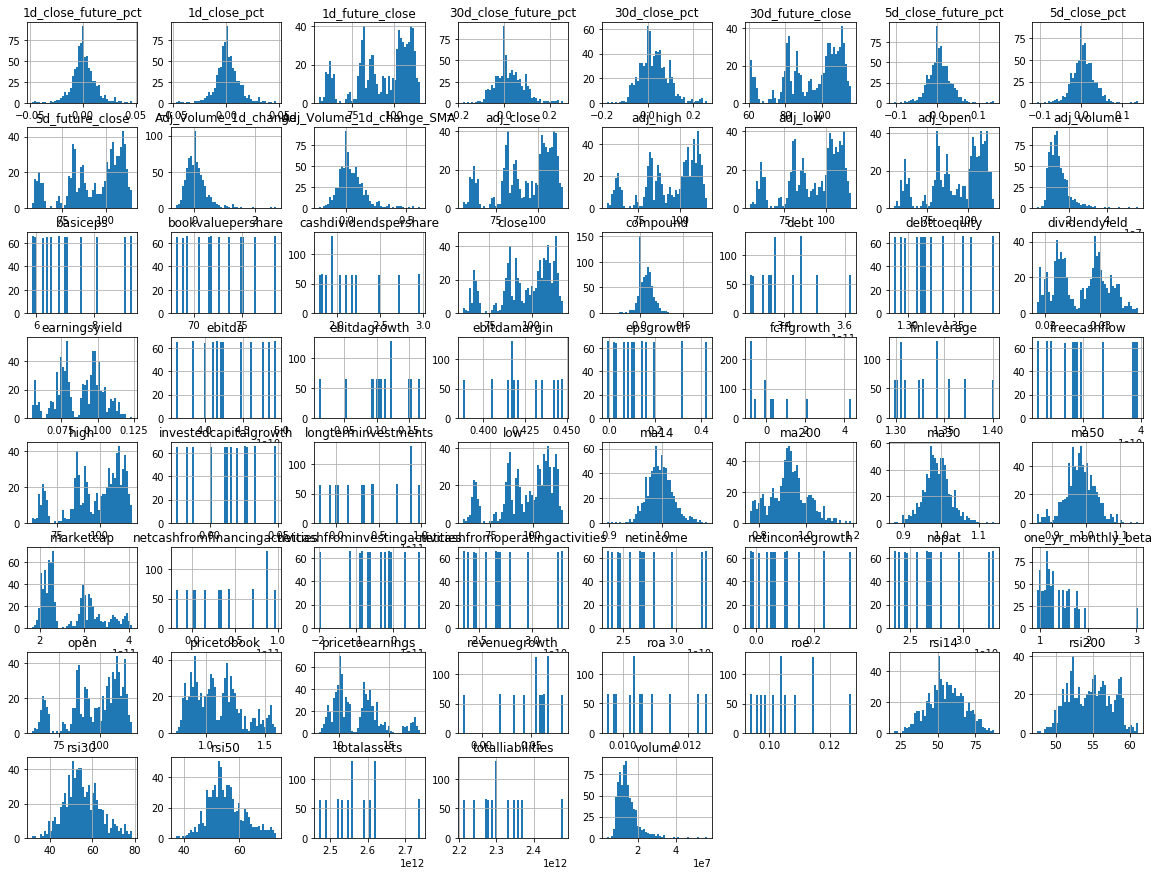

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [55]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2016-07-01 to 2019-05-27
Data columns (total 64 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              782 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null

In [56]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'debttoequity', 'epsgrowth',
       'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth',
       'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets',
       'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', '1d_future_close', '1d_close_future_pct',
       '1d_close_pct', '30d_future_cl

In [57]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.067025  0.043875   
5d_close_pct                              -0.067025      1.000000 -0.858092   
ma14                                       0.043875     -0.858092  1.000000   
rsi14                                     -0.082804      0.677376 -0.855944   
ma30                                       0.073780     -0.646312  0.858238   
rsi30                                     -0.058890      0.516328 -0.692489   
ma50                                       0.071854     -0.518952  0.712273   
rsi50                                     -0.047741      0.416773 -0.573901   
ma200                                      0.048862     -0.277274  0.395250   
rsi200                                    -0.084917      0.232213 -0.329264   
compound                                  -0.078836      0.139142 -0.121159   
marketcap                                  0.115228 

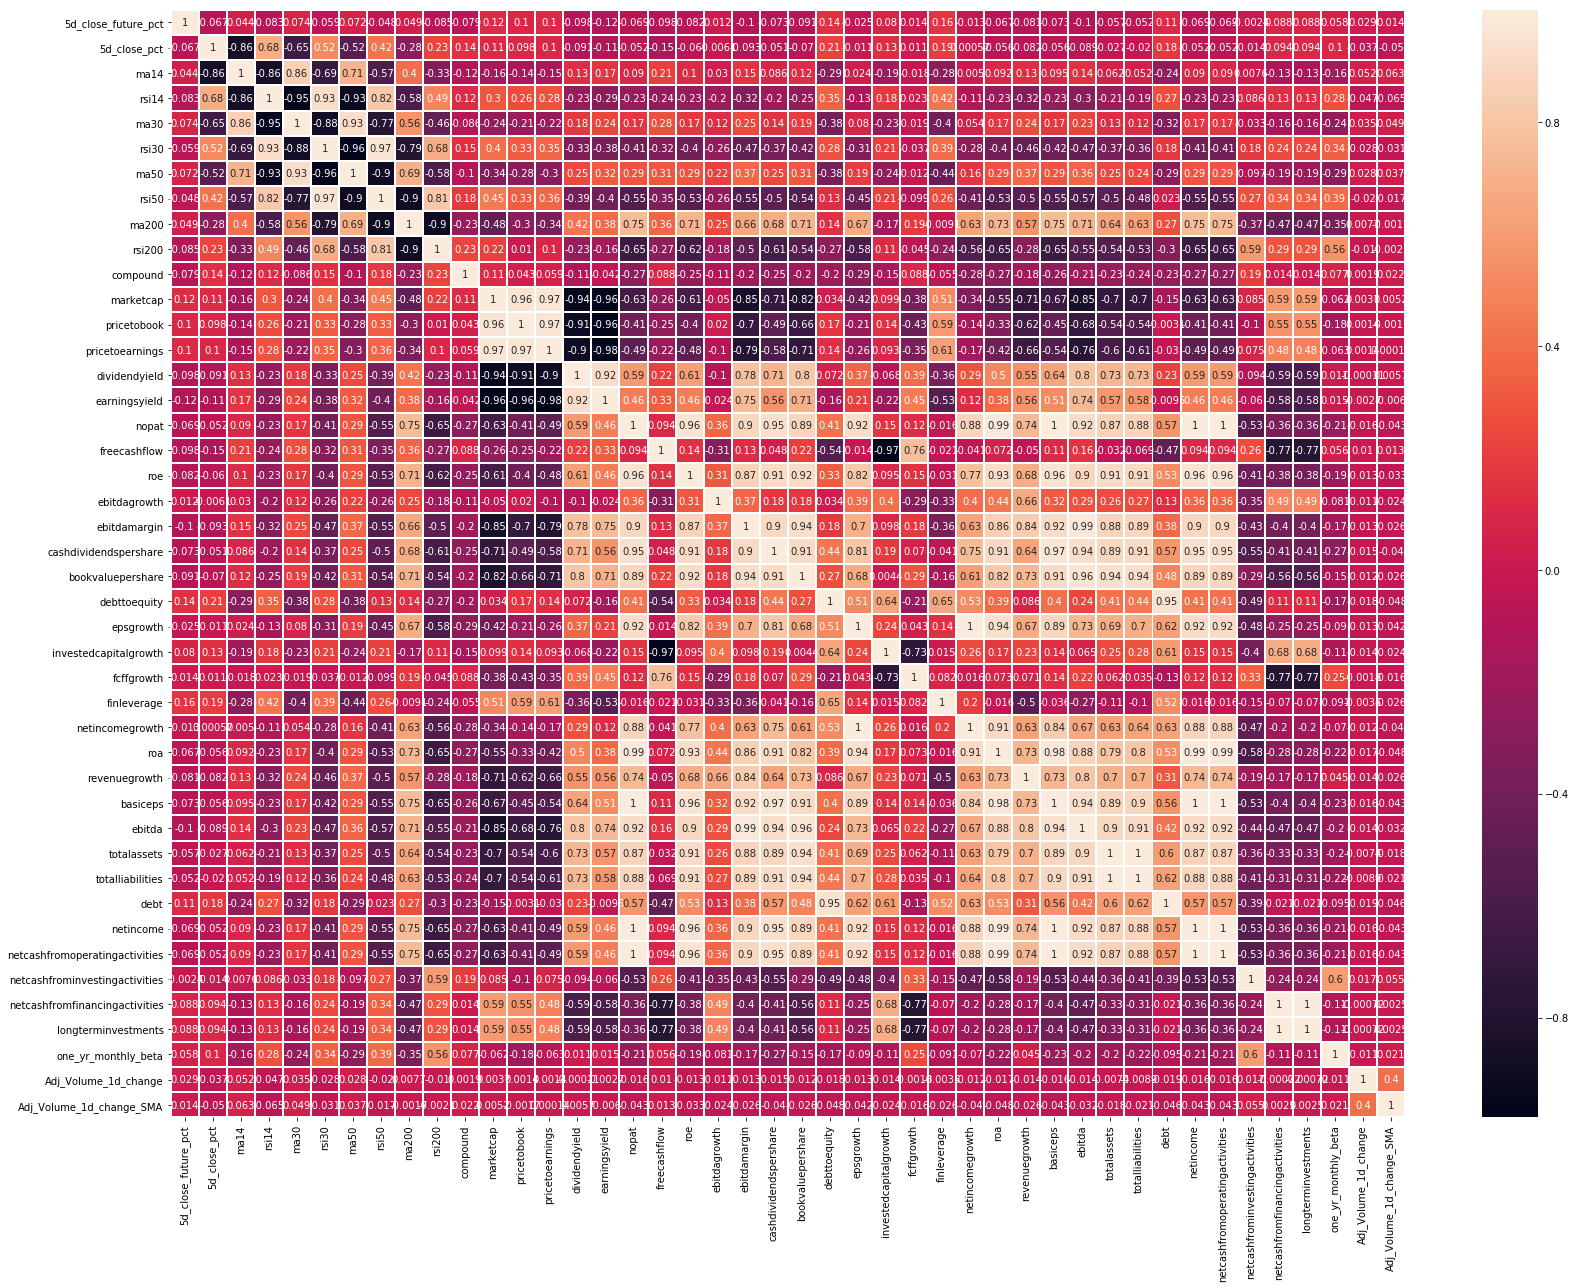

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [59]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 28 columns


In [60]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'rsi200',
       'compound', 'earningsyield', 'ebitdagrowth', 'investedcapitalgrowth',
       'fcffgrowth', 'finleverage', 'revenuegrowth', 'totalliabilities',
       'debt', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_close_future_pct', '5d_close_pct',
       '1d_close_future_pct', '1d_close_pct', '30d_future_close',
       '30d_close_future_pct', '30d_close_pct', 'Adj_Volume_1d_change',
       'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [61]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [62]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [63]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['5d_close_future_pct']





In [64]:
targets.describe()

count    694.000000
mean       0.004629
std        0.028436
min       -0.105756
25%       -0.011878
50%        0.004324
75%        0.021474
max        0.137808
Name: 5d_close_future_pct, dtype: float64

In [65]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 31) (555, 31) (139, 31)
(694, 31) (555, 31) (139, 31)


In [66]:
train_size

555

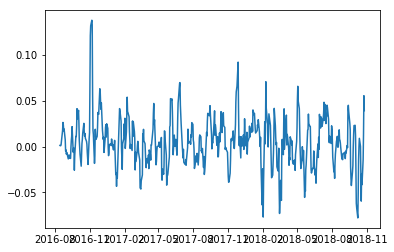

In [67]:
plt.plot(train_targets)

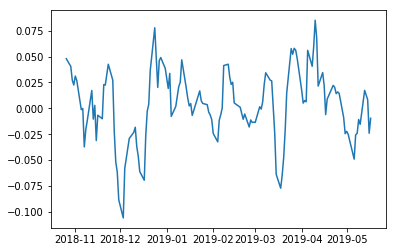

In [68]:
plt.plot(test_targets)

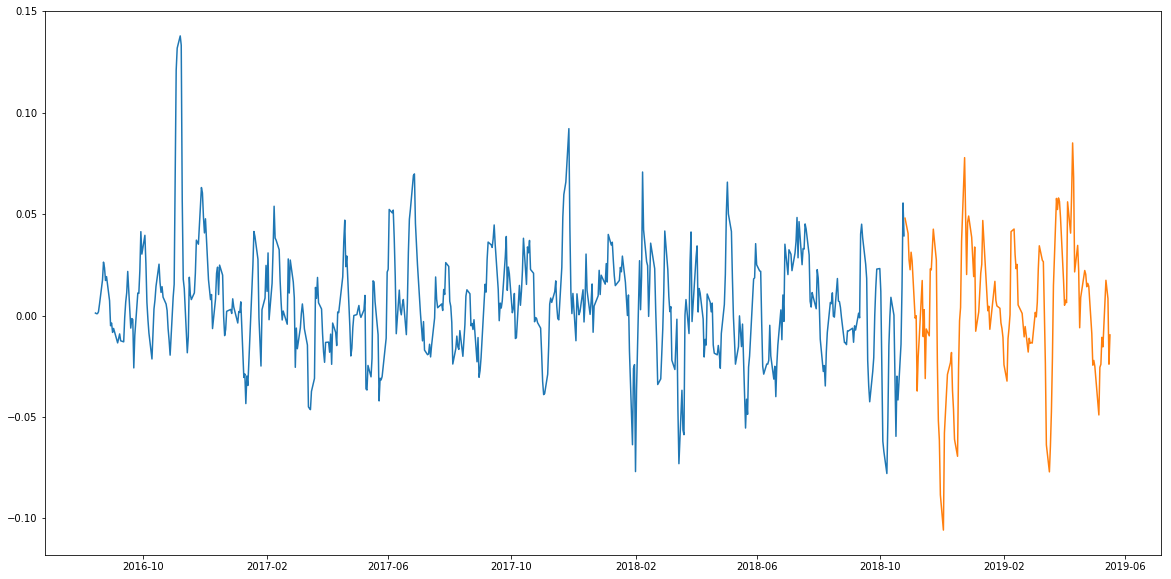

In [69]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.show()

In [70]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.241
Model:                             OLS   Adj. R-squared:                  0.219
Method:                  Least Squares   F-statistic:                     11.38
Date:                 Thu, 05 Sep 2019   Prob (F-statistic):           2.32e-24
Time:                         23:57:31   Log-Likelihood:                 1293.6
No. Observations:                  555   AIC:                            -2555.
Df Residuals:                      539   BIC:                            -2486.
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

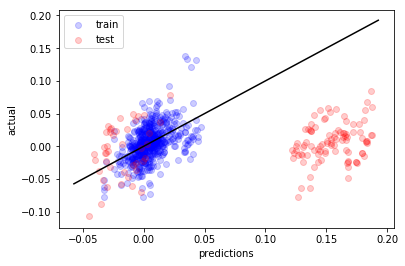

In [71]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [72]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [73]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.30174017230163963
-16.838390659155046


In [74]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.000508758281481964
0.01990759818372443


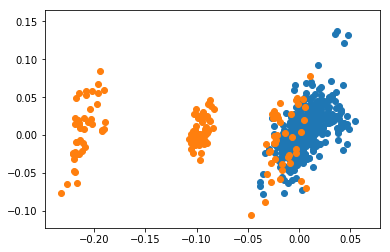

In [75]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [77]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 31) (555, 31) (139, 31)
(694, 31) (555, 31) (139, 31)


In [78]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [79]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.30174590129169465
-21.28618144112747


In [80]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0005087541072891788
0.024871321278741268
Train Root mean squared error: 0.022555578185654623
Test Root mean squared error: 0.15770644019424593


In [81]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
test

,Prediction
date,
2018-10-26,0.112534
2018-10-29,0.107777
2018-10-30,0.123444
2018-10-31,0.066573
2018-11-01,0.083218
2018-11-02,0.076808
2018-11-05,0.051664
2018-11-06,0.049144
2018-11-07,0.044715


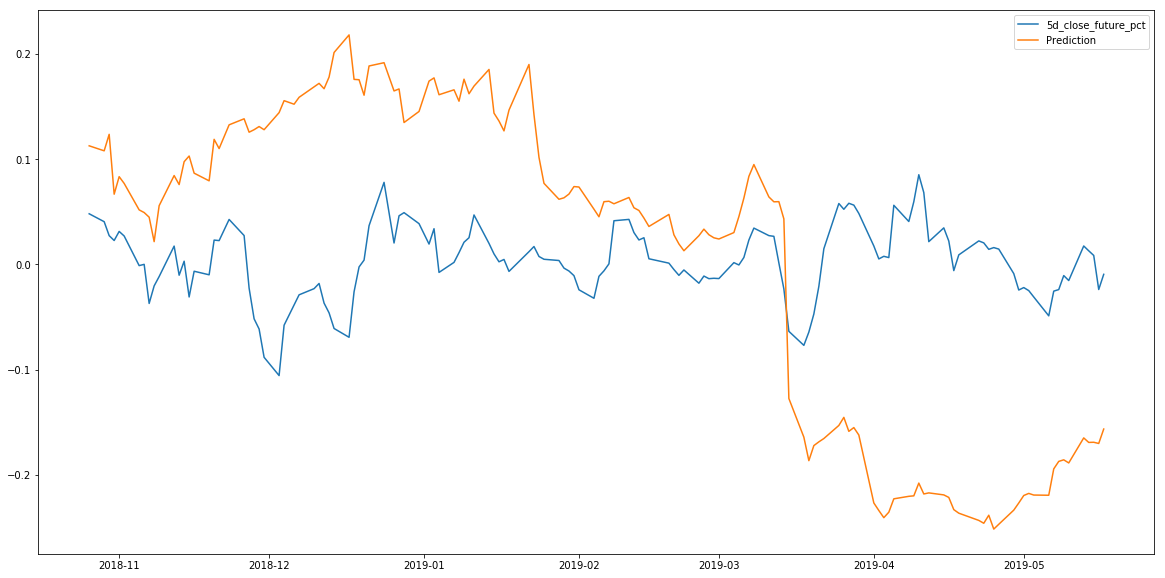

In [82]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

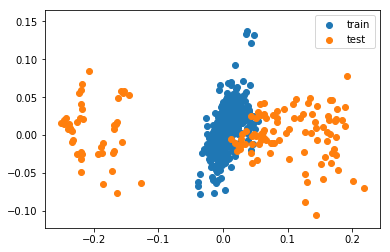

In [83]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -0.7% of the variance in the test set.
The model has ignored 31 out of 31 features.


In [86]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.006878707531127848
0.0011236740529051144
0.03352124778263951


In [87]:
from sklearn.linear_model import Ridge

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


ridge=pd.DataFrame(data=test_scores, index=alphas)

ridge

,0
20.0000,6.153455e-03
10.0000,1.317120e-02
5.0000,2.191074e-02
4.0000,2.476259e-02
3.0000,2.801786e-02
2.0000,3.061714e-02
1.5000,2.973217e-02
1.0000,2.161539e-02
0.5000,-2.498101e-02
0.1000,-3.793449e-01


In [174]:
ridgeReg = Ridge(alpha=3, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.07246780548366438
Test r2: 0.028017860792527327


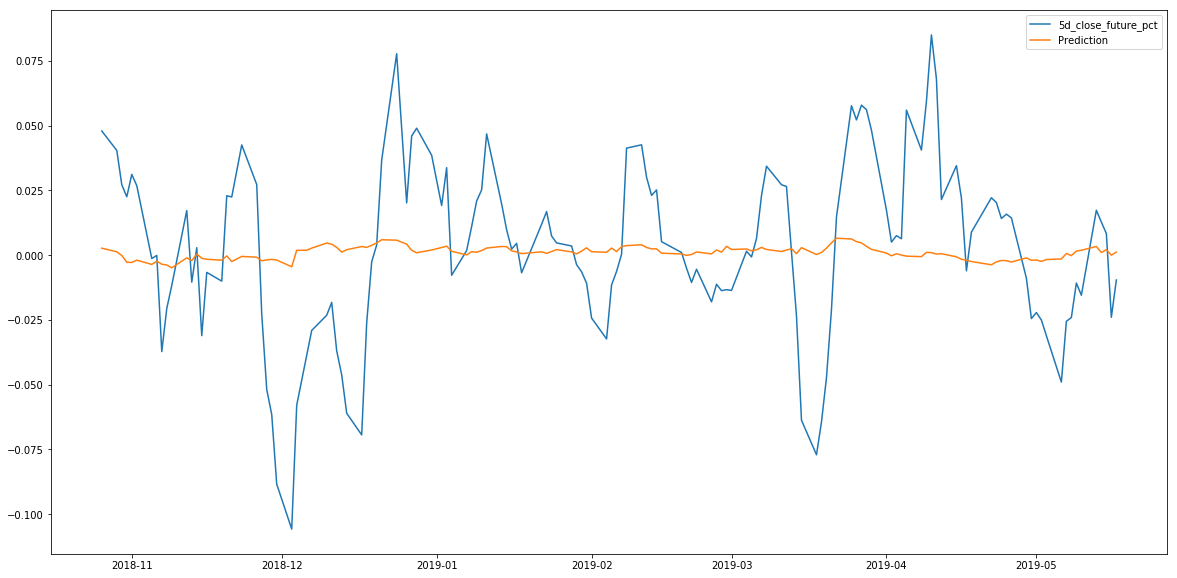

In [175]:
column =['Prediction']
ridge_pred= pd.DataFrame(pred,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(ridge_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

In [91]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.5, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred_cv)
mse = mean_squared_error(test_targets, pred_cv)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.04053228920872087
Test r2: 0.006656141429372542


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [92]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1)

# Fit
pls.fit(scaled_train_features, train_targets)

# Prediction
train_predicitions = pls.predict(scaled_train_features)
test_predicitions = pls.predict(scaled_test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.30174590129169465
Test r2: -21.28618144112747
0.024871321278741268
0.15770644019424593


In [93]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(train_features, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  1

R2: -34.082
MSE: 0.039
SEP: 0.070
RPD: 0.481
Bias: -0.185


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


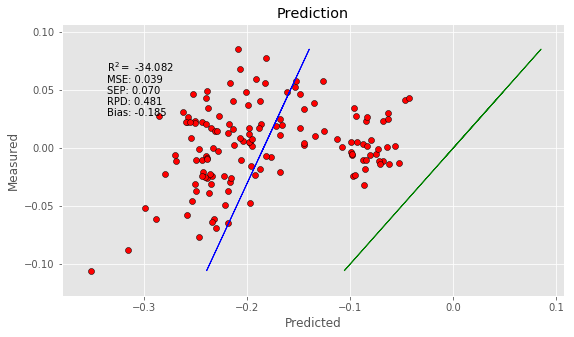

In [95]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

### PCA

[ 42.25  57.89  68.03  74.77  80.19  84.8   88.91  91.94  94.23  96.22
  97.41  98.31  99.01  99.26  99.49  99.7   99.8   99.89  99.93  99.96
  99.98  99.99 100.   100.   100.   100.   100.   100.  ]
0.07668858464371986
0.021365835660888788
0.0010921532152077438
0.033047741453959355


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


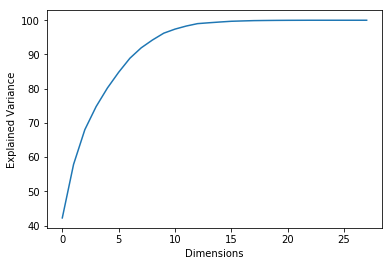

In [101]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=28)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=8)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999888652097294
-2.0230926936877016


In [103]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999888652097294
-1.4272281856330582


In [104]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.2813544835141656
-1.254184591217495 

max_depth= 5
0.4171975281683179
-2.1719139069689315 

max_depth= 10
0.7948688049664322
-1.1188997776034189 



In [105]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-2.4909023451935357
-2.769781994734317 

max_depth= 5
-2.2539421637796146
-2.539807470681686 

max_depth= 10
-2.2966733387574
-2.315436627125313 



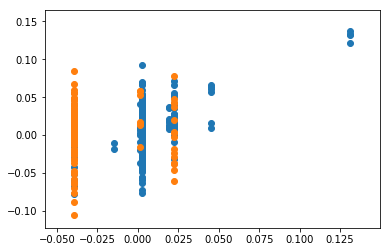

In [106]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9346977890919834
-0.15570924892352633


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [108]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,28], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.05328903040083455 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [109]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.2761907523515955
0.05328903040083455


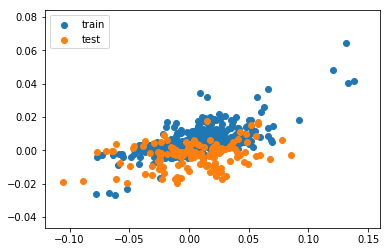

In [172]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

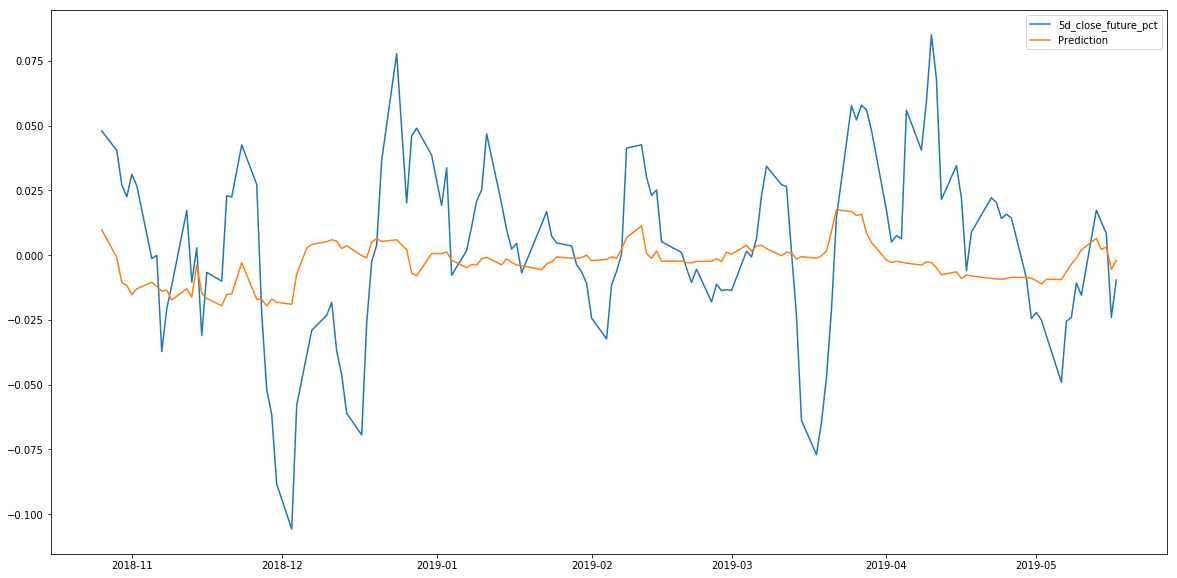

In [173]:
column =['Prediction']
rfr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(rfr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

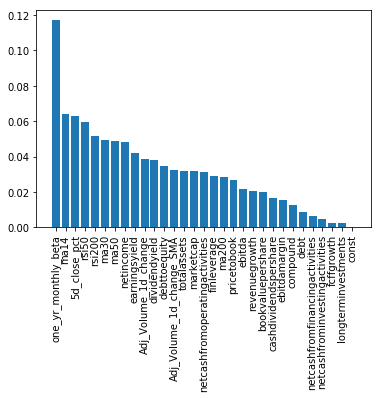

In [111]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [170]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)
train_predictions = gbr.predict(train_features)
test_predictions = gbr.predict(test_features)


print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.35094287390679546
0.061434566637538435


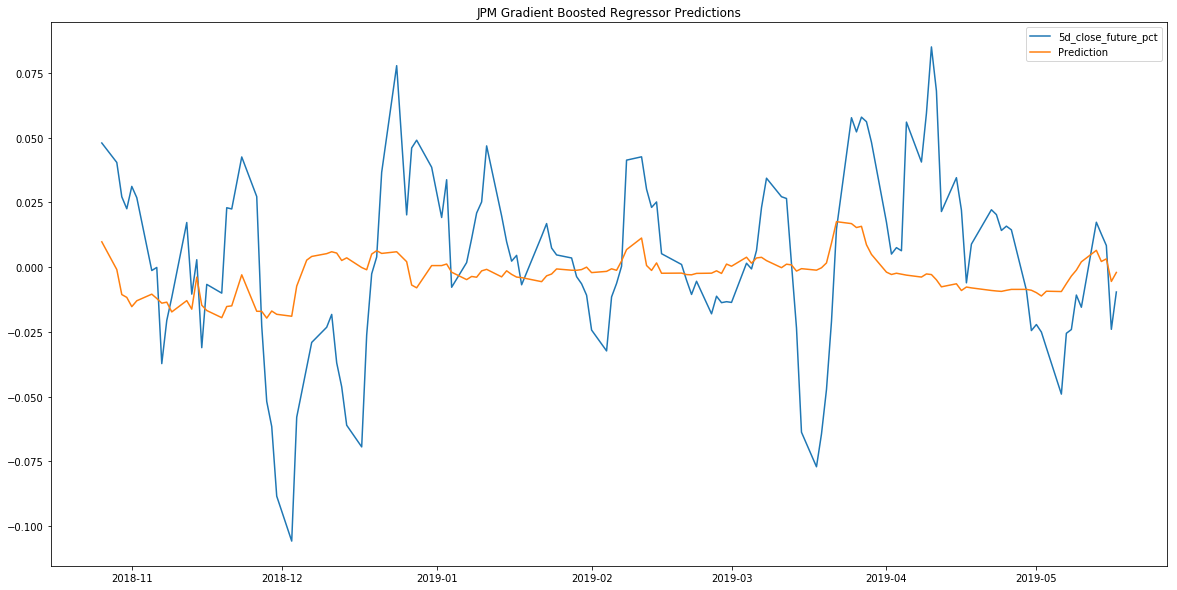

In [176]:
column =['Prediction']
gbr_pred= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)


plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(gbr_pred)
plt.legend(['5d_close_future_pct','Prediction'])
plt.title('JPM Gradient Boosted Regressor Predictions')
plt.show()

In [113]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

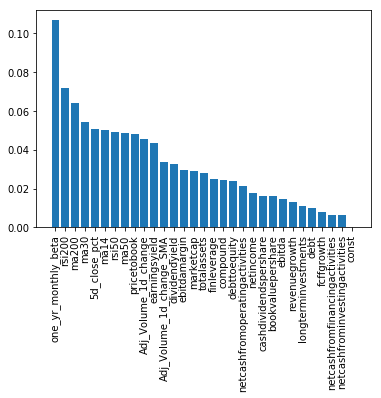

In [114]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


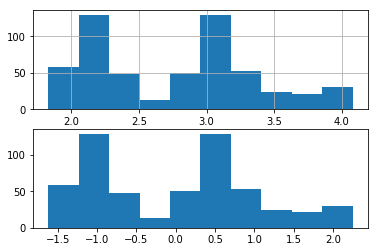

In [115]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [116]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7724279008218222
-0.14985998834247471

n_neighbors = 3
train, test scores
0.6426361372211404
-0.08425638303075567

n_neighbors = 4
train, test scores
0.5515854751100144
-0.01173831321052532

n_neighbors = 5
train, test scores
0.4689244007514223
0.0024563508649252386

n_neighbors = 6
train, test scores
0.43020877962625437
-0.004392208081838156

n_neighbors = 7
train, test scores
0.3916775946479679
-0.0023602294985496375

n_neighbors = 8
train, test scores
0.3679947071434272
0.025442538191518094

n_neighbors = 9
train, test scores
0.3421257370058437
0.008042357513420417

n_neighbors = 10
train, test scores
0.3298722342389918
0.00042153979070258535

n_neighbors = 11
train, test scores
0.32551223935241325
0.010012283288760915

n_neighbors = 12
train, test scores
0.31551929228090636
0.013915545491057559

n_neighbors = 13
train, test scores
0.2922782967289451
0.0321559196561525

n_neighbors = 14
train, test scores
0.2867555927164419
0.02291917930276466

n

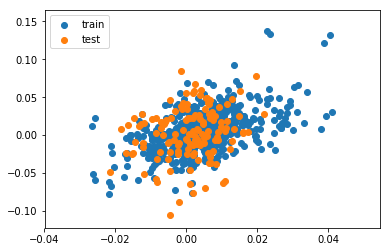

In [117]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=15)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [118]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
555/555 [==============================] - 0s 298us/step - loss: 0.0379
Epoch 2/25
555/555 [==============================] - 0s 21us/step - loss: 0.0120
Epoch 3/25
555/555 [==============================] - 0s 20us/step - loss: 0.0065
Epoch 4/25
555/555 [==============================] - 0s 20us/step - loss: 0.0044
Epoch 5/25
555/555 [==============================] - 0s 20us/step - loss: 0.0034
Epoch 6/25
555/555 [==============================] - 0s 26us/step - loss: 0.0028
Epoch 7/25
555/555 [==============================] - 0s 24us/step - loss: 0.0020
Epoch 8/25
555/555 [==============================] - 0s 23us/step - loss: 0.0017
Epoch 9/25
555/555 [==============================] - 0s 24us/step - loss: 0.0015
Epoch 10/25
555/555 [==============================] - 0s 26us/step - loss: 0.0013
Epoch 11/25
555/555 [==============================] - 0s 22us/step - loss: 0.0014
Epoch 12/25
555/555 [==============================] - 0s 25us/step - loss: 0.0011
Epoch 13/25


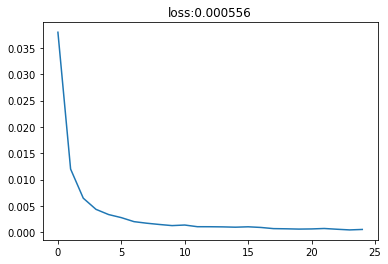

In [119]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.2431338181459891
-48.921506558478235


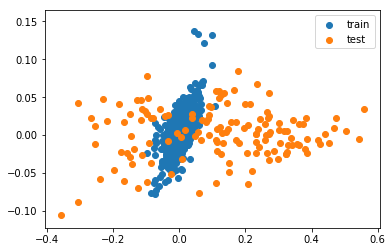

In [120]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [121]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c2a4917b8>


Epoch 1/25
555/555 [==============================] - 0s 337us/step - loss: 3.1315
Epoch 2/25
555/555 [==============================] - 0s 23us/step - loss: 0.7715
Epoch 3/25
555/555 [==============================] - 0s 22us/step - loss: 0.4669
Epoch 4/25
555/555 [==============================] - 0s 22us/step - loss: 0.3201
Epoch 5/25
555/555 [==============================] - 0s 29us/step - loss: 0.2821
Epoch 6/25
555/555 [==============================] - 0s 28us/step - loss: 0.1998
Epoch 7/25
555/555 [==============================] - 0s 23us/step - loss: 0.1898
Epoch 8/25
555/555 [==============================] - 0s 23us/step - loss: 0.1359
Epoch 9/25
555/555 [==============================] - 0s 29us/step - loss: 0.1216
Epoch 10/25
555/555 [==============================] - 0s 23us/step - loss: 0.1270
Epoch 11/25
555/555 [==============================] - 0s 24us/step - loss: 0.1095
Epoch 12/25
555/555 [==============================] - 0s 22us/step - loss: 0.1023
Epoch 13/25


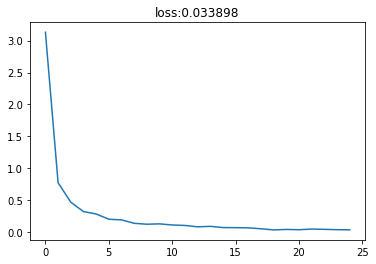

In [122]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-6.533561217454062
-35.27621175273861


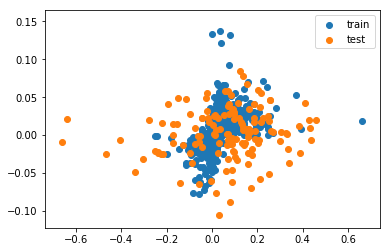

In [123]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
555/555 [==============================] - 0s 396us/step - loss: 0.1076
Epoch 2/25
555/555 [==============================] - 0s 24us/step - loss: 0.0460
Epoch 3/25
555/555 [==============================] - 0s 22us/step - loss: 0.0291
Epoch 4/25
555/555 [==============================] - 0s 24us/step - loss: 0.0242
Epoch 5/25
555/555 [==============================] - 0s 34us/step - loss: 0.0177
Epoch 6/25
555/555 [==============================] - 0s 28us/step - loss: 0.0124
Epoch 7/25
555/555 [==============================] - 0s 30us/step - loss: 0.0131
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0096
Epoch 9/25
555/555 [==============================] - 0s 26us/step - loss: 0.0096
Epoch 10/25
555/555 [==============================] - 0s 31us/step - loss: 0.0075
Epoch 11/25
555/555 [==============================] - 0s 27us/step - loss: 0.0067
Epoch 12/25
555/555 [==============================] - 0s 22us/step - loss: 0.0054
Epoch 13/25


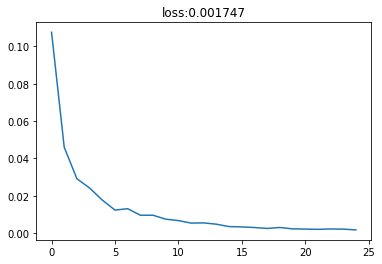

In [124]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [125]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[0.07690143 0.09650777 0.09585013 0.04399471 0.05516213]


0.00888197487001674
-9.755932975622082


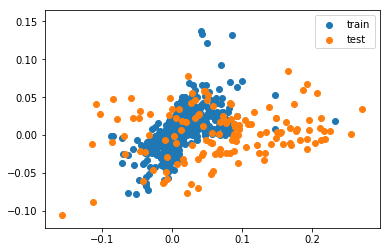

In [126]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

### Results Summary DF

In [150]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
df_results = pd.DataFrame({"Training":'', 
                         "Test":''},index=Models)


In [151]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
rmse_results = pd.DataFrame({"Training":[np.sqrt(mean_squared_error(train_targets, train_predictions))], 
          "Test":[np.sqrt(mean_squared_error(test_targets, test_predictions))]},index=Models)


In [152]:
from sklearn.linear_model import LinearRegression
# scikit-learn:
scaler = StandardScaler()

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)


lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)



train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Linear Regression']['Training']=train_score
df_results.loc['Linear Regression']['Test']=score
rmse_results.loc['Linear Regression']['Training']=train_rmse
rmse_results.loc['Linear Regression']['Test']=rmse

In [153]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.01)
# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)
pred = la.predict(test_features)
train_pred= la.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_pred))

df_results.loc['Lasso']['Training']=train_score
df_results.loc['Lasso']['Test']=score
rmse_results.loc['Lasso']['Training']=train_rmse
rmse_results.loc['Lasso']['Test']=rmse

In [154]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=2, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse = np.sqrt(mean_squared_error(train_targets, train_pred))
               
df_results.loc['Ridge']['Training']=train_score
df_results.loc['Ridge']['Test']=score
rmse_results.loc['Ridge']['Training']=train_rmse
rmse_results.loc['Ridge']['Test']=rmse



In [155]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=True)

ENreg.fit(train_features,train_targets)

test_predictions = ENreg.predict(test_features)
train_predictions= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))
df_results.loc['Elastic Net']['Training']=train_score
df_results.loc['Elastic Net']['Test']=score
rmse_results.loc['Elastic Net']['Training']=train_rmse
rmse_results.loc['Elastic Net']['Test']=rmse

In [156]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['PLS']['Training']=train_score
df_results.loc['PLS']['Test']=score
rmse_results.loc['PLS']['Training']=train_rmse
rmse_results.loc['PLS']['Test']=rmse

In [157]:
from sklearn.decomposition import PCA
X=train_features
X_test=test_features
X = scale(X)
X_test=scale(X_test)

# Reduce dimensions based off variance curve
pca = PCA(n_components=8)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

y = train_targets
lr.fit(X1,y)
pred=lr.predict(X1)
y_pred=lr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
rmse = np.sqrt(mean_squared_error(test_targets, y_pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, pred))

df_results.loc['PCA']['Training']=train_score
df_results.loc['PCA']['Test']=score
rmse_results.loc['PCA']['Training']=train_rmse
rmse_results.loc['PCA']['Test']=rmse

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [158]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor(max_depth=3,random_state=42)

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Decision Tree']['Training']=train_score
df_results.loc['Decision Tree']['Test']=score
rmse_results.loc['Decision Tree']['Training']=train_rmse
rmse_results.loc['Decision Tree']['Test']=rmse

In [159]:
from sklearn.ensemble import RandomForestRegressor
#Fit model
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

#Predict test data
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

#Measure performance
train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Random Forest']['Training']=train_score
df_results.loc['Random Forest']['Test']=score
rmse_results.loc['Random Forest']['Training']=train_rmse
rmse_results.loc['Random Forest']['Test']=rmse

In [166]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features,train_targets)
train_predictions = gbr.predict(train_features)
test_predictions = gbr.predict(test_features)


train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['GBR']['Training']=train_score
df_results.loc['GBR']['Test']=score
rmse_results.loc['GBR']['Training']=train_rmse
rmse_results.loc['GBR']['Test']=rmse

In [161]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor(n_neighbors=15)
    
# Fit the model to the training data
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['KNN']['Training']=train_score
df_results.loc['KNN']['Test']=score
rmse_results.loc['KNN']['Training']=train_rmse
rmse_results.loc['KNN']['Test']=rmse
    

In [162]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)


train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN1']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN1']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN1']['Training']=train_rmse
rmse_results.loc['NN1']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 757us/step - loss: 0.0411
Epoch 2/25
555/555 [==============================] - 0s 22us/step - loss: 0.0088
Epoch 3/25
555/555 [==============================] - 0s 22us/step - loss: 0.0050
Epoch 4/25
555/555 [==============================] - 0s 23us/step - loss: 0.0034
Epoch 5/25
555/555 [==============================] - 0s 27us/step - loss: 0.0024
Epoch 6/25
555/555 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 7/25
555/555 [==============================] - 0s 23us/step - loss: 0.0016
Epoch 8/25
555/555 [==============================] - 0s 27us/step - loss: 0.0015
Epoch 9/25
555/555 [==============================] - 0s 24us/step - loss: 0.0013
Epoch 10/25
555/555 [==============================] - 0s 22us/step - loss: 0.0012
Epoch 11/25
555/555 [==============================] - 0s 23us/step - loss: 9.5243e-04
Epoch 12/25
555/555 [==============================] - 0s 35us/step - loss: 8.8486e-04
Epoc

In [163]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)





train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)

rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN2']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN2']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN2']['Training']=train_rmse
rmse_results.loc['NN2']['Test']=rmse


<function sign_penalty at 0x1c2a5e8730>
Epoch 1/25
555/555 [==============================] - 0s 580us/step - loss: 5.8366
Epoch 2/25
555/555 [==============================] - 0s 23us/step - loss: 1.0381
Epoch 3/25
555/555 [==============================] - 0s 23us/step - loss: 0.3792
Epoch 4/25
555/555 [==============================] - 0s 27us/step - loss: 0.2464
Epoch 5/25
555/555 [==============================] - 0s 27us/step - loss: 0.1735
Epoch 6/25
555/555 [==============================] - 0s 25us/step - loss: 0.1367
Epoch 7/25
555/555 [==============================] - 0s 24us/step - loss: 0.1120
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0931
Epoch 9/25
555/555 [==============================] - 0s 26us/step - loss: 0.0785
Epoch 10/25
555/555 [==============================] - 0s 23us/step - loss: 0.0786
Epoch 11/25
555/555 [==============================] - 0s 29us/step - loss: 0.0646
Epoch 12/25
555/555 [==============================] - 

In [164]:
from keras.layers import Dropout
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)

train_preds = model_3.predict(scaled_train_features)
test_preds = model_3.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN3']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN3']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN3']['Training']=train_rmse
rmse_results.loc['NN3']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 650us/step - loss: 0.1358
Epoch 2/25
555/555 [==============================] - 0s 27us/step - loss: 0.0503
Epoch 3/25
555/555 [==============================] - 0s 27us/step - loss: 0.0324
Epoch 4/25
555/555 [==============================] - 0s 34us/step - loss: 0.0268
Epoch 5/25
555/555 [==============================] - 0s 29us/step - loss: 0.0182
Epoch 6/25
555/555 [==============================] - 0s 29us/step - loss: 0.0147
Epoch 7/25
555/555 [==============================] - 0s 30us/step - loss: 0.0136
Epoch 8/25
555/555 [==============================] - 0s 32us/step - loss: 0.0108
Epoch 9/25
555/555 [==============================] - 0s 30us/step - loss: 0.0102
Epoch 10/25
555/555 [==============================] - 0s 26us/step - loss: 0.0092
Epoch 11/25
555/555 [==============================] - 0s 23us/step - loss: 0.0077
Epoch 12/25
555/555 [==============================] - 0s 28us/step - loss: 0.0069
Epoch 13/25


In [168]:
df_results.round(3)

,Training,Test
Linear Regression,0.301746,-21.2862
Lasso,0,-0.00687871
Ridge,0.0869765,0.0306171
Elastic Net,0,-0.00687871
PLS,0,-0.00687871
PCA,0.0766886,0.0213658
Decision Tree,0.281354,-1.25418
Random Forest,0.276191,0.053289
GBR,0.350943,0.0614346
KNN,0.267609,0.0376253


Text(0.5,1,'JPM R Squared 5 Day Model Performance')

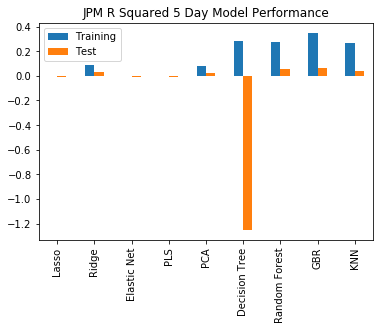

In [169]:
df_results=df_results.drop(['Linear Regression'])
df_results.iloc[:-3:].plot(kind='bar')
plt.title('JPM R Squared 5 Day Model Performance')

In [ ]:
rmse_results.round(4)

In [ ]:
rmse_results.round(4).iloc[:-3:].plot(kind='bar')